 # TP4. Regression on Tabular data
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

In [4]:
X = np.arange(-3,8,0.01)

In [5]:
y = X**3 -9*X**2 + 5* X -1 + np.random.normal(0,10, len(X))

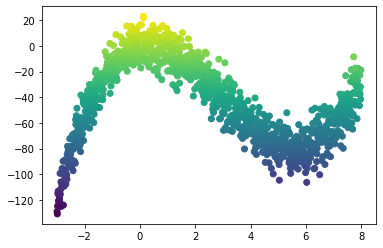

In [6]:
plt.scatter(X,y, c=y)
plt.show()

In [7]:
X[:10]

array([-3.  , -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92,
       -2.91])

In [8]:
X.shape

(1100,)

In [9]:
y[:10]

array([-129.11799704, -130.94676251, -124.80502743, -115.0434801 ,
       -113.22605656, -120.92385098, -115.9372806 , -120.38294586,
       -116.3216916 , -119.04627184])

In [10]:
y.shape

(1100,)

**Question 1. Split data into train/test with ratio 2:1 ussing Sklearn train_test_split**

**Question 2. Train the model with sklearn Linear Regression and predict on train data and draw the curve**

In [12]:



# plt.scatter(X_train, y_train)
# plt.scatter(X_train,y_train_pred)
# plt.show()

**Question 3. Get prediction on test data and draw the curve**

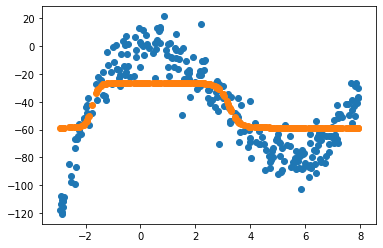

In [137]:


# plt.scatter(X_test,y_test)
# plt.scatter(X_test,y_test_pred)
# plt.show()

**Exercise. Try other models:** 
    - Polynomial, 
    - Ridge, 
    - Lasso, 
    - Support Vector Regressor
    - Decision Tree Regressor
    - Multi-layer Perceptron Regressor (Basic Neural Network)

## FIFA 2019 Dataset

In [147]:
df = pd.read_csv('data/fifa.csv', index_col = 'Unnamed: 0')

In [149]:
df.shape

(18207, 88)

In [148]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Rotate the table for better view

In [152]:
df.head().transpose()

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Club Logo,https://cdn.sofifa.org/teams/2/light/241.png,https://cdn.sofifa.org/teams/2/light/45.png,https://cdn.sofifa.org/teams/2/light/73.png,https://cdn.sofifa.org/teams/2/light/11.png,https://cdn.sofifa.org/teams/2/light/10.png


list of columns

In [145]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

There are lot of things to clean here. 

- First, remove all rows that contain a NaN value (i.e. remove all players with incomplete data) 

- Remove unecessary columns (any column you don't like), the more information you keep, the better.

- Convert the remaining columns to numeric data (eg. €100k to 100000)

**Problem 1. Use 'Value' as the label Y, use the rest information to predict the Value of a player, using Sklearn**

**Question 2: Use 'Overrall' as the label Y, use the rest information (except Potential) to predict the Overall rating of a player, using Sklearn**